In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
from glob import glob


In [3]:
import IPython.display as ipd
from tqdm import tqdm

In [4]:
import subprocess

In [5]:
plt.style.use('ggplot')

In [6]:
ipd.Video('demo2.mp4', width=700,height=500)

In [7]:
cap = cv2.VideoCapture('demo2.mp4')

In [8]:
# Total number of frames in video
cap.get(cv2.CAP_PROP_FRAME_COUNT)

1623.0

In [9]:
fps = cap.get(cv2.CAP_PROP_FPS)
totalNoFrames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
durationInSeconds = totalNoFrames // fps

print("Video Duration In Seconds:", durationInSeconds, "s")

Video Duration In Seconds: 54.0 s


In [10]:
def get_dur(filename):
    video = cv2.VideoCapture(filename)
    fps = video.get(cv2.CAP_PROP_FPS)
    frame_count = video.get(cv2.CAP_PROP_FRAME_COUNT)
   # seconds = frame_count / fps
    minutes = int(durationInSeconds / 60)
    rem_sec = int(durationInSeconds % 60)
    return f"{minutes}:{rem_sec}"

print('Video Duration In minute:secounds=',get_dur("Videos/One min video.mov"))

Video Duration In minute:secounds= 0:54


In [11]:
import datetime

def get_dur(filename):
    video = cv2.VideoCapture(filename)
    fps = video.get(cv2.CAP_PROP_FPS)
    frame_count = video.get(cv2.CAP_PROP_FRAME_COUNT)
 
    video_time = datetime.timedelta(seconds=durationInSeconds)
    return video_time

print('Video Duration In hour:minute:secounds=',get_dur("Videos/One min video.mov"))

Video Duration In hour:minute:secounds= 0:00:54


In [12]:
# Video height and width
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
print(f'Height {height}, Width {width}')

Height 1920.0, Width 1080.0


In [13]:
# Get frames per second
fps = cap.get(cv2.CAP_PROP_FPS)
print(f'FPS : {fps:0.2f}')

FPS : 30.00


In [18]:
cap.release()

In [20]:
## pulling out a 1st image from the video
def display_cv2_img(img, figsize=(10, 10)):
    img_ = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(img_)
    ax.axis("off")

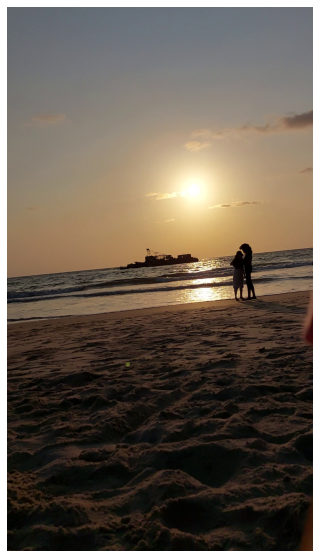

In [21]:
display_cv2_img(img)

In [22]:
cap.release()

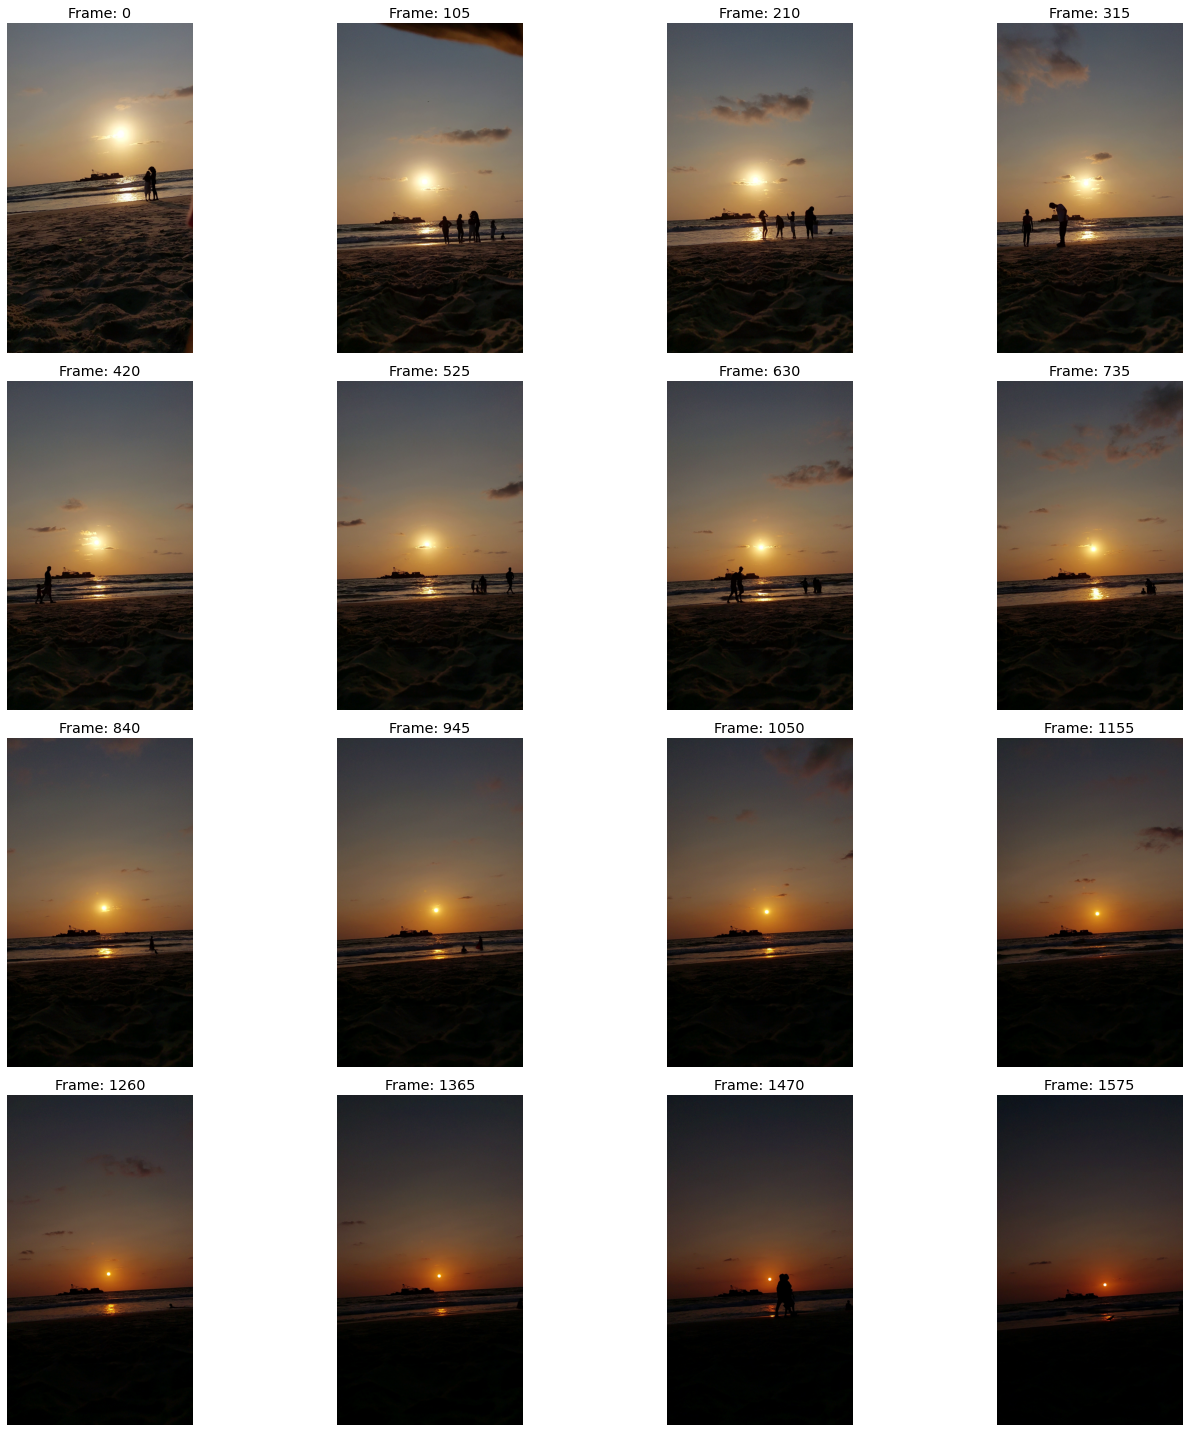

In [23]:
fig, axs = plt.subplots(4, 4, figsize=(20, 20))
axs = axs.flatten()

cap = cv2.VideoCapture("demo2.mp4")
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

img_idx = 0
for frame in range(n_frames):
    ret, img = cap.read()
    if ret == False:
        break
    if frame % 105 == 0:
        axs[img_idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axs[img_idx].set_title(f'Frame: {frame}')
        axs[img_idx].axis('off')
        img_idx += 1

plt.tight_layout()
plt.show()
cap.release()

In [24]:
# Pull frame 1155

cap = cv2.VideoCapture("demo2.mp4")
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

img_idx = 0
for frame in range(n_frames):
    ret, img = cap.read()
    if ret == False:
        break
    if frame == 1155:
        break
cap.release()

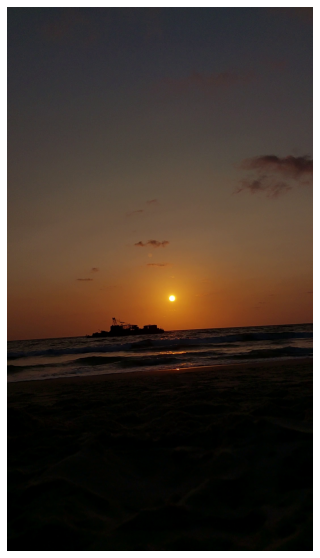

In [25]:
display_cv2_img(img)

In [ ]:
# the input video and input image add any of your choice. The ouput video will be generated when you run the code

In [1]:
import cv2        #add watermark only to particular frames

def add_invisible_watermark_to_frames(input_video_path, watermark_image_path, output_video_path, alpha=0.2, frames_to_mark=[1, 5, 10]):
    cap = cv2.VideoCapture(input_video_path)
    watermark = cv2.imread(watermark_image_path, cv2.IMREAD_UNCHANGED)

    fps = int(cap.get(cv2.CAP_PROP_FPS))
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

    frame_number = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        frame_number += 1

        if frame_number in frames_to_mark:
            # Resize watermark to match frame size
            watermark_resized = cv2.resize(watermark, (frame_width, frame_height))

            # Blend the frame and watermark using alpha blending
            merged_frame = cv2.addWeighted(frame, 1 - alpha, watermark_resized, alpha, 0)
        else:
            merged_frame = frame

        out.write(merged_frame)
        cv2.imshow('Watermarked Video', merged_frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    out.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    input_video_path = 'demo_1.mp4'
    watermark_image_path = 'logo.jpeg'
    output_video_path = 'output_video_with_watermark2.mp4'
    alpha_value = 0.5  # Adjust the alpha value as needed
    frames_to_mark = [41, 42, 43,44,45,46,47,92,93,94,95,96,97]  # Add watermark to these frame numbers

    add_invisible_watermark_to_frames(input_video_path, watermark_image_path, output_video_path, alpha_value, frames_to_mark)

In [2]:
import cv2     # adding visible watermark to particular frames

def add_watermark(frame, watermark_path):
    # Read the watermark image
    watermark = cv2.imread(watermark_path)

    # Get the dimensions of the frame and watermark
    frame_height, frame_width = frame.shape[:2]
    watermark_height, watermark_width = watermark.shape[:2]

    # Calculate the position to place the watermark
    position_x = frame_width - watermark_width - 10  # Adjust the position as needed
    position_y = frame_height - watermark_height - 10  # Adjust the position as needed

    # Overlay the watermark on the frame
    frame[position_y:position_y+watermark_height, position_x:position_x+watermark_width] = (
        watermark
    )

    return frame

# Load the video using OpenCV
video_path = 'demo2.mp4'  # Replace with your video path
cap = cv2.VideoCapture(video_path)

# Get the total number of frames in the video
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Set the frame numbers to apply watermarks
frame_numbers = [100, 101, 102,103,104,105,106,107,108,109,110,200, 201, 202,203,204,205,206,207,208,209,210,]  # Replace with the desired frame numbers

# Create an output video writer
output_path = 'demo10.mp4'  # Replace with the desired output video path
fps = cap.get(cv2.CAP_PROP_FPS)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Choose a fourcc codec (try different codecs if the default doesn't work)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # MPEG-4 codec

output_video = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

# Read and process each frame
for frame_num in range(total_frames):
    ret, frame = cap.read()

    # Check if the current frame number is in the list of frame numbers
    if frame_num in frame_numbers:
        # Add watermark to the frame
        watermark_path = 'logo.jpeg'  # Replace with your watermark image path
        frame_with_watermark = add_watermark(frame, watermark_path)
        
        # Write the frame with the watermark to the output video
        output_video.write(frame_with_watermark)
    else:
        # Write the frame without the watermark to the output video
        output_video.write(frame)

# Release the video capture and writer
cap.release()
output_video.release()


In [3]:
import cv2    # adding invisible watermark to all frames

def add_invisible_watermark(input_video_path, watermark_image_path, output_video_path, alpha=0.2):
    cap = cv2.VideoCapture(input_video_path)
    watermark = cv2.imread(watermark_image_path, cv2.IMREAD_UNCHANGED)

    fps = int(cap.get(cv2.CAP_PROP_FPS))
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    fourcc = cv2.VideoWriter_fourcc(*'XVID')    #"Four Character Code.", four-byte code used to identify and specify the video codec used for encoding or compressing a video file.
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Resize watermark to match frame size
        watermark_resized = cv2.resize(watermark, (frame_width, frame_height))

        # Blend the frame and watermark using alpha blending
        merged_frame = cv2.addWeighted(frame, 1 - alpha, watermark_resized, alpha, 0)

        out.write(merged_frame)
        cv2.imshow('Invisible Watermarked Video', merged_frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    out.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    input_video_path = 'demo.mp4'
    watermark_image_path = 'logo.jpeg'
    output_video_path = 'watermarked_video_output.mp4'
    alpha_value = 0.005  # Adjust the alpha value as needed        
# if alpha value is increased then it becomes visible watermark
    add_invisible_watermark(input_video_path, watermark_image_path, output_video_path, alpha_value)